In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("expense_data_1.csv")
print(df.head())

             Date                     Account        Category  Subcategory  \
0  3/2/2022 10:11  EasyPaisa - online payment            Food          NaN   
1  3/2/2022 10:11  EasyPaisa - online payment           Other          NaN   
2  3/1/2022 19:50  EasyPaisa - online payment            Food          NaN   
3  3/1/2022 18:56  EasyPaisa - online payment  Transportation          NaN   
4  3/1/2022 18:22  EasyPaisa - online payment            Food          NaN   

               Note    pkr Income/Expense  Note.1  Amount Currency  Account.1  
0           Brownie   50.0        Expense     NaN    50.0      pkr       50.0  
1  To lended people  300.0        Expense     NaN   300.0      pkr      300.0  
2            Dinner   78.0        Expense     NaN    78.0      pkr       78.0  
3             Metro   30.0        Expense     NaN    30.0      pkr       30.0  
4            Snacks   67.0        Expense     NaN    67.0      pkr       67.0  


In [3]:
# clean
data = df[["Date","Category","Note","Amount","Income/Expense"]]
print(data.head())

             Date        Category              Note  Amount Income/Expense
0  3/2/2022 10:11            Food           Brownie    50.0        Expense
1  3/2/2022 10:11           Other  To lended people   300.0        Expense
2  3/1/2022 19:50            Food            Dinner    78.0        Expense
3  3/1/2022 18:56  Transportation             Metro    30.0        Expense
4  3/1/2022 18:22            Food            Snacks    67.0        Expense


In [7]:
# add multiple expenses
def add_expense(date, category, note, amount, exp_type="Expense"):
    global data
    new_entry = {
        "Date": date,
        "Category": category,
        "Note": note,
        "Amount": amount,
        "Income/Expense": exp_type
    }
    data = pd.concat([data, pd.DataFrame([new_entry])], ignore_index=True)
    print(f"Added: {note} - {amount} ({category})")

# Add expenses
add_expense("2025-08-22 19:30", "Food", "Shwarma", 2500)
add_expense("2025-08-23 08:00", "Subscription", "Netflix Monthly Plan", 4500)
add_expense("2025-08-24 14:00", "Entertainment", "Outdoor Games with friends", 7000)

# Show data
print("\nCurrent Expense Data:\n", data)

Added: Shwarma - 2500 (Food)
Added: Netflix Monthly Plan - 4500 (Subscription)
Added: Outdoor Games with friends - 7000 (Entertainment)

Current Expense Data:
                  Date        Category                        Note  Amount  \
0      3/2/2022 10:11            Food                     Brownie    50.0   
1      3/2/2022 10:11           Other            To lended people   300.0   
2      3/1/2022 19:50            Food                      Dinner    78.0   
3      3/1/2022 18:56  Transportation                       Metro    30.0   
4      3/1/2022 18:22            Food                      Snacks    67.0   
..                ...             ...                         ...     ...   
275  11/21/2021 15:50            Food                       Lunch   875.0   
276  11/21/2021 13:30           Other               Got from gobi  2000.0   
277  2025-08-22 19:30            Food                     Shwarma  2500.0   
278  2025-08-23 08:00    Subscription        Netflix Monthly Plan  450

In [8]:
# view recent expenses
def view_expenses(n=5):
    return data.tail(n)

print(view_expenses(5))

                 Date       Category                        Note  Amount  \
275  11/21/2021 15:50           Food                       Lunch   875.0   
276  11/21/2021 13:30          Other               Got from gobi  2000.0   
277  2025-08-22 19:30           Food                     Shwarma  2500.0   
278  2025-08-23 08:00   Subscription        Netflix Monthly Plan  4500.0   
279  2025-08-24 14:00  Entertainment  Outdoor Games with friends  7000.0   

    Income/Expense  
275        Expense  
276         Income  
277        Expense  
278        Expense  
279        Expense  


In [9]:
#summarize spending
def summarize_expenses(by= "Category"):
    summary = data[data["Income/Expense"]=="Expense"].groupby(by)["Amount"].sum()
    return summary.sort_values(ascending=False)
print(summarize_expenses())

Category
Food                25896.76
Household           12188.00
Transportation       9203.80
Entertainment        7000.00
Other                5117.00
Subscription         4500.00
Apparel              3388.00
Social Life          2513.72
Education            1400.00
Self-development      400.00
Beauty                196.00
Gift                  115.00
Name: Amount, dtype: float64


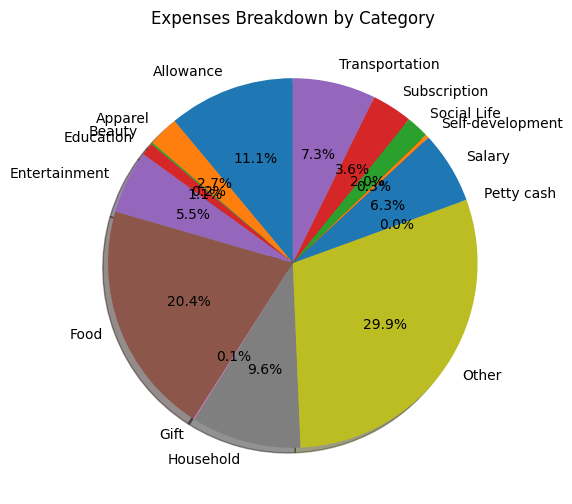

In [10]:
import matplotlib.pyplot as plt
expense_summary = data[data['Category'] != 'Income'].groupby("Category")["Amount"].sum()

# Pie Chart
plt.figure(figsize=(6,6))
expense_summary.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Expenses Breakdown by Category")
plt.ylabel("")
plt.show()

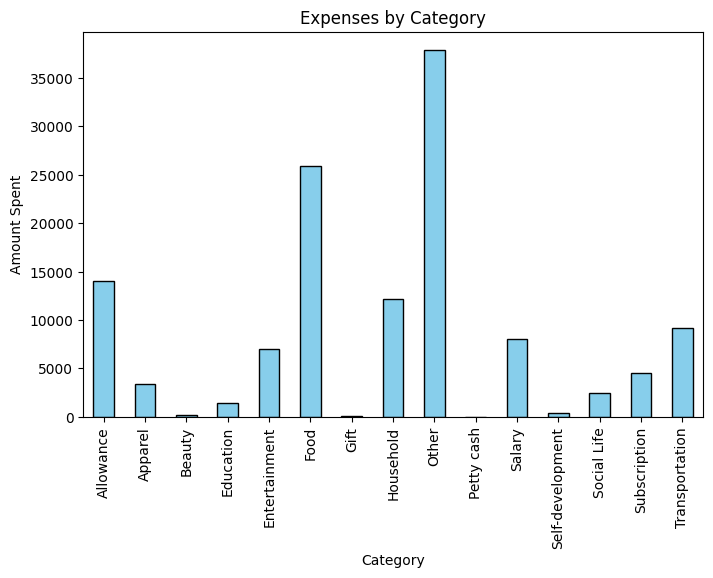

In [11]:
# Bar Chart
plt.figure(figsize=(8,5))
expense_summary.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Expenses by Category")
plt.xlabel("Category")
plt.ylabel("Amount Spent")
plt.show()